In [9]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [10]:
base_dir=r"C:\Users\rk reddy\OneDrive\Documents\Cats_and_Dogs_Dataset"

In [11]:
cat_dir = os.path.join(base_dir, 'cats')
dog_dir = os.path.join(base_dir, 'dogs')

cat_files = os.listdir(cat_dir)
dog_files = os.listdir(dog_dir)


print(f'Number of cat images: {len(cat_files)}')
print(f'Number of dog images: {len(dog_files)}')


Number of cat images: 1000
Number of dog images: 1000


In [12]:
def load_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array /= 255.0
    return img_array
    

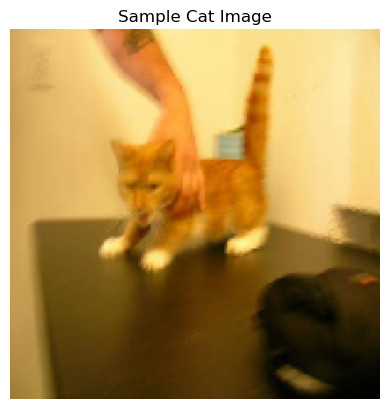

In [13]:
sample_cat_img_path = os.path.join(cat_dir, cat_files[0])
sample_cat_img = load_image(sample_cat_img_path)

plt.imshow(sample_cat_img)
plt.title('Sample Cat Image')
plt.axis('off')
plt.show()

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



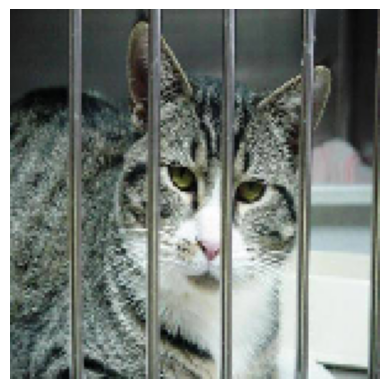

In [15]:
img_path =r"C:\Users\rk reddy\OneDrive\Documents\Cats_and_Dogs_Dataset\cats\cat.17.jpg"
img_array = load_image(img_path)

# Display the image using matplotlib
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [16]:

def load_and_flatten_image(img_path, target_size=(150, 150)):
    # Load image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    # Convert image to NumPy array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    # Flatten the array to 1-D
    img_array = img_array.flatten()
    # Normalize the pixel values to [0, 1]
    img_array /= 255.0
    return img_array

In [17]:
 import pandas as pd

def load_data_from_directory(base_dir, target_size=(150, 150)):
    data = []
    labels = []
    
    # Directories
    cat_dir = os.path.join(base_dir, 'cats')
    dog_dir = os.path.join(base_dir, 'dogs')
    
    # Process Cat Images
    for filename in os.listdir(cat_dir):
        img_path = os.path.join(cat_dir, filename)
        img_array = load_and_flatten_image(img_path, target_size)
        data.append(img_array)
        labels.append(0)  # Label for cats
    
    # Process Dog Images
    for filename in os.listdir(dog_dir):
        img_path = os.path.join(dog_dir, filename)
        img_array = load_and_flatten_image(img_path, target_size)
        data.append(img_array)
        labels.append(1)  # Label for dogs
    
    # Convert to NumPy arrays
    data = np.array(data)
    labels = np.array(labels)
    
    return data, labels

# Define base directory
base_dir = r'C:\Users\rk reddy\OneDrive\Documents\Cats_and_Dogs_Dataset'

# Load data
data, labels = load_data_from_directory(base_dir)
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

# Optionally save data and labels to files
np.save('image_data.npy', data)
np.save('labels.npy', labels)


Data shape: (2000, 67500)
Labels shape: (2000,)


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
data, labels = load_data_from_directory(base_dir)
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (2000, 67500)
Labels shape: (2000,)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Standardizing the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Creating and training the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predicting the test set results
y_pred = lr.predict(x_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.620


In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)



0.5525

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.64

In [24]:
import pandas as pd

In [25]:
pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_pred})

,Actual_value,Predicted_value
0,1,0
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
395,0,0
396,0,1
397,1,0
398,1,1
